In [1]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

matplotlib.rcParams['pdf.fonttype'] = 42
sns.set()
tqdm.pandas()

C:\Users\serce\AppData\Local\Continuum\anaconda3\envs\behaviour-switching\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
h5 = r"J:\Alja Podgornik\Multimaze arena\Cohort 1_June 2020\all_outputs_main\cleaned_h5s\accumulated.h5"
df = pd.read_hdf(h5)

In [3]:
print(df['zone'].unique())
df = df[(df['zone'] != 'exit1') & (df['zone'] != 'exit2') & (df['zone'] != 'exit3')]
print(df['zone'].unique())

['interspace' 'social' 'exit3' 'marble' 'nest' 'drinking' 'exit1' 'exit2']
['interspace' 'social' 'marble' 'nest' 'drinking']


In [4]:
del df['social']
del df['marble']
del df['nest']
del df['drinking']
del df['black_circle']

In [ ]:
df['animal'].unique()

In [ ]:
def shift_times(df):
    df = df[df.zone != df.zone.shift(-1)]
    df.loc[:, 'time'] -= df.time.shift(fill_value=0)
    df = df[df['time'] > 5]
    return df

tt = df.groupby('animal').progress_apply(lambda df: shift_times(df))

In [ ]:
sns.catplot(data=tt, kind='bar', y='zone', x='time', hue='group', col='stim', palette='Set1') ####

In [ ]:
uu = tt.copy()
uu.index = uu.index.droplevel(0)
totaltime = uu.groupby(['group','animal', 'zone', 'stim']).sum().reset_index().dropna()
ax = sns.catplot(data=totaltime, kind='box', x='zone', y='time', hue='group', col='stim', palette='Set1')  ####
ax.set_xticklabels(rotation=30)
ax.set(ylabel='Total zone visit duration')

array(['chr9', 'chr4', 'ctrl5', 'hr4', 'hr6', 'hr10', 'hr1', 'hr2', 'hr7',
       'ctrl1', 'chr7', 'ctrl8', 'chr1', 'chr8', 'ctrl9', 'chr6', 'chr2',
       'hr9', 'chr10', 'hr3', 'ctrl6', 'ctrl10', 'hr8', 'chr3', 'hr5',
       'ctrl2', 'ctrl7', 'ctrl4', 'ctrl3', 'chr5'], dtype=object)

In [6]:
def shift_times(df):
    df = df[df.zone != df.zone.shift(-1)]
    df.loc[:, 'time'] -= df.time.shift(fill_value=0)
    df = df[df['time'] > 5]
    return df

tt = df.groupby('animal').progress_apply(lambda df: shift_times(df))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  7.47it/s]


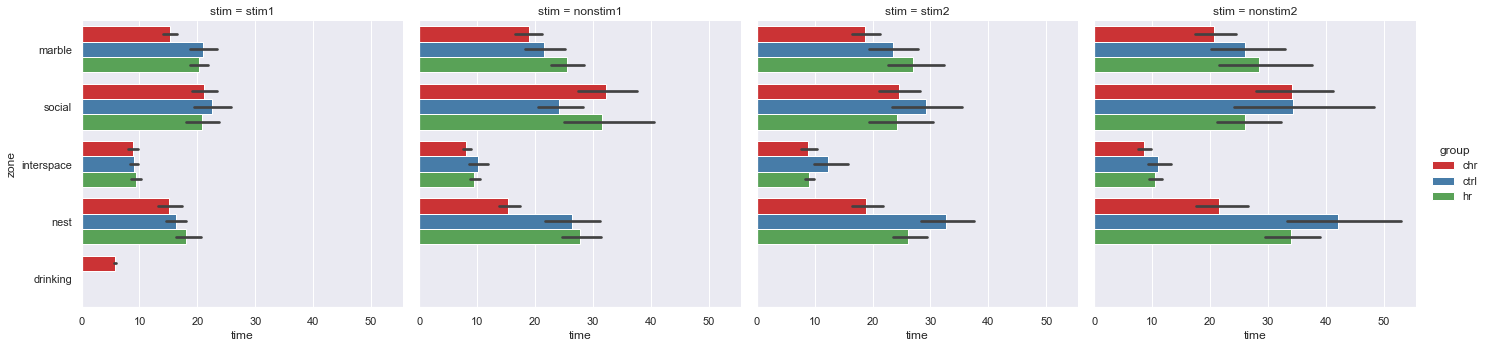

In [7]:
sns.catplot(data=tt, kind='bar', y='zone', x='time', hue='group', col='stim', palette='Set1') ####

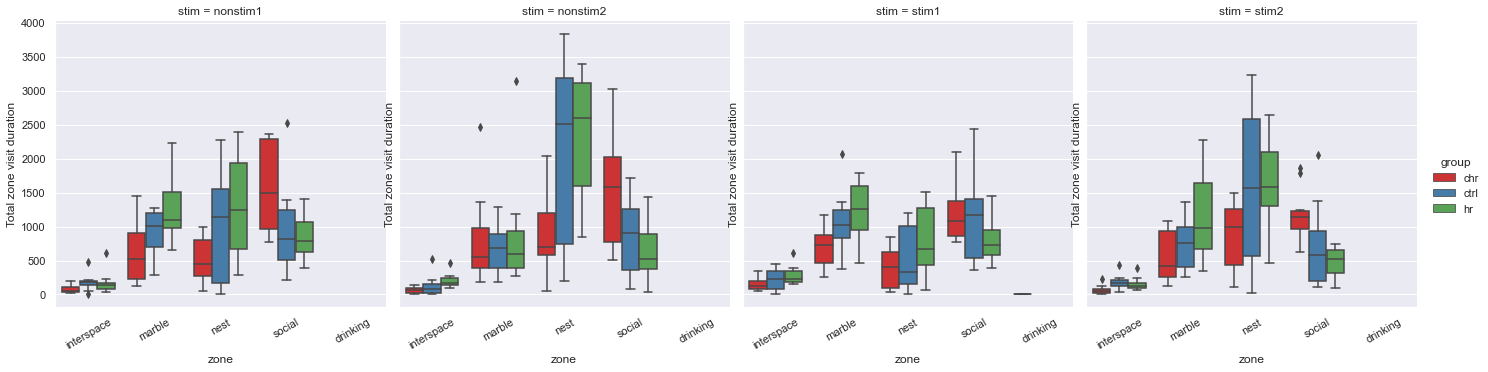

In [9]:
uu = tt.copy()
uu.index = uu.index.droplevel(0)
totaltime = uu.groupby(['group','animal', 'zone', 'stim']).sum().reset_index().dropna()
ax = sns.catplot(data=totaltime, kind='box', x='zone', y='time', hue='group', col='stim', palette='Set1')  ####
ax.set_xticklabels(rotation=30)
ax.set(ylabel='Total zone visit duration')